In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
df = yf.download("MSFT",
start="2022-01-01",
end="2023-01-31",
adjusted=True)

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:title={'center':"Microsoft's returns"}, xlabel='Date'>

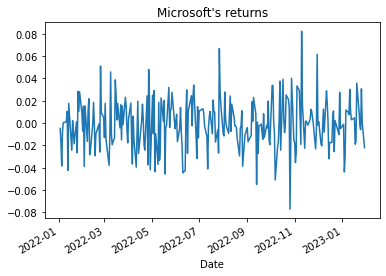

In [4]:
returns = df["Adj Close"].pct_change().dropna()
returns.plot(title="Microsoft's returns")

In [5]:
train = returns["2022"]
test = returns["2023"]

In [6]:
T = len(test)
N = len(test)
S_0 = df.loc[train.index[-1], "Adj Close"]
N_SIM = 100
mu = train.mean()
sigma = train.std()

In [35]:
# Define the Function For Simulation
def simulate_gbm(S_0, mu, sigma, N_, T, N, random_seed=42):
    np.random.seed(random_seed)
    dt = T / N
    dW = np.random.normal(scale=np.sqrt(dt), size=(N_SIM, N))
    W = np.cumsum(dW, axis=1)

    time_step = np.linspace(dt, T, N)
    time_steps = np.broadcast_to(time_step, (N_SIM, N))

    S_t = S_0 * np.exp((mu - 0.5 * sigma ** 2) * time_steps + sigma * W)
    S_t = np.insert(S_t, 0, S_0, axis=1)

    return S_t


In [36]:
gbm_simulations = simulate_gbm(S_0, mu, sigma, N_SIM, T, N)
sim_df = pd.DataFrame(np.transpose(gbm_simulations),
                        index=train.index[-1:].union(test.index))

In [37]:
res_df = sim_df.mean(axis=1).to_frame()
res_df = res_df.join(df["Adj Close"])
res_df.columns = ["simulation_average", "adj_close_price"]

<AxesSubplot:title={'center':"Simulation's results"}, xlabel='Date'>

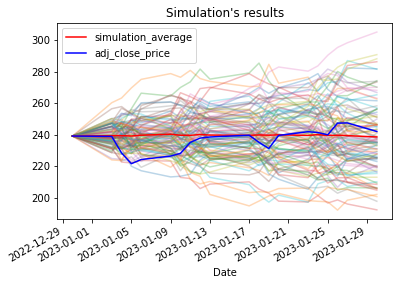

In [38]:
ax = sim_df.plot(
alpha=0.3, legend=False, title="Simulation's results"
)
res_df.plot(ax=ax, color = ["red", "blue"])